In [1]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import os

# Benchmarking the System Performance

In [ ]:
run_id = 'SP500_5Predictors_Horizon40'

In [ ]:
os.mkdir(run_id)

In [ ]:
dir_ = './' + run_id + '/'

This Jupyter notebook serves to benchmark the performance of the prototype system.

### Loading and importing the system

In [33]:
%run ../tools/dataloader.py
%run ../system/activate.py

### Loading and importing financial data to forecast and to benchmark the system on

In [32]:
predict = DataLoader('F', '2018-02-01', '2018-05-01')
predict = predict.get_adjclose()

In [4]:
predict_req, real = data_prep(predict, 20, 5) # dividing data into predictor input and real data

### Individual predictor forecasts

In [5]:
individual_predictors_forecasts = individual_predictors_pretrained_Ford_5_3(predict_req, 5)

### System disagreement between individual predictor forecasts

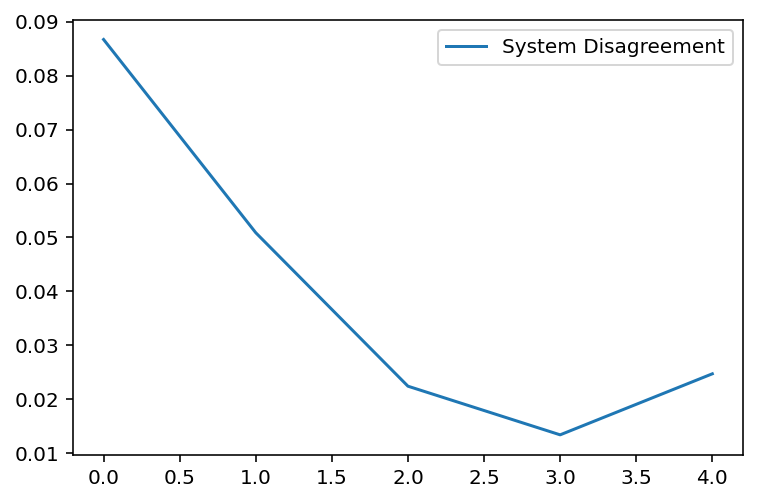

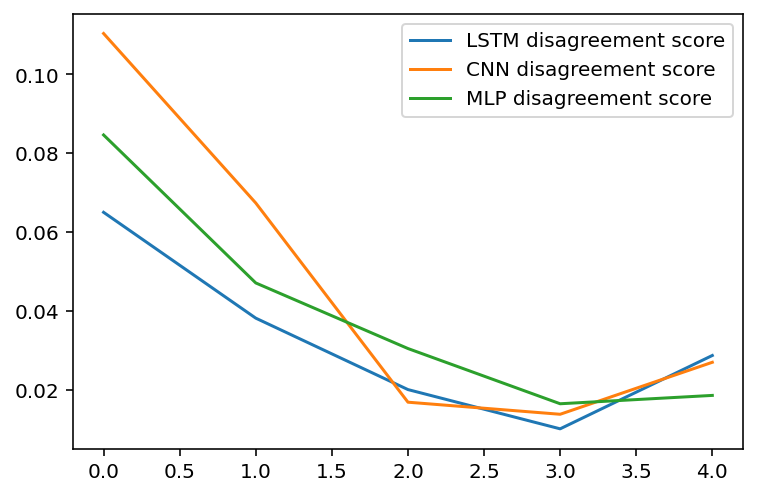

In [6]:
system_disagreement(individual_predictors_forecasts)

### Building consensus forecast values

In [7]:
consensus_forecasts = consensus(individual_predictors_forecasts, real)

In [8]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [9]:
summary = all_stats_frame(all_forecasts, individual_predictors_forecasts) # combining individual predictor forecasts, consensus forecasts and disagreement scores
summary

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,LSTM,CNN,MLP,System Disagreement,LSTM disagreement score,CNN disagreement score,MLP disagreement score
Date,,,,,,,,,,,,,,,
2018-03-02,9.163022,9.163022,9.163022,9.163022,9.265702,9.163022,9.163022,9.166625,9.137268,9.273428,9.078369,0.086693,0.065020,0.110406,0.084653
2018-03-05,9.135443,9.129996,9.132720,9.115152,9.111274,9.139326,9.137385,9.325278,9.115152,9.202824,9.088354,0.050875,0.038157,0.067380,0.047089
2018-03-06,9.195274,9.196792,9.196513,9.205691,9.219000,9.386556,9.260444,9.369350,9.215300,9.205691,9.164831,0.022430,0.020026,0.016823,0.030443
2018-03-07,9.143953,9.143286,9.143479,9.141284,9.182396,9.317136,9.235939,9.369350,9.141284,9.130195,9.160379,0.013415,0.010062,0.013758,0.016427
2018-03-08,9.182680,9.182483,9.182006,9.184406,9.246212,9.409060,9.301778,9.351720,9.153999,9.209634,9.184406,0.024726,0.028680,0.026954,0.018545


In [ ]:
summary.to_csv(dir_ + run_id + '_Forecast_Summary.csv')

### Absolute error analysis of individual predictors and consensus forecasts

In [ ]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real)
prediction_error

In [ ]:
prediction_error.to_csv(dir_ + run_id + '_Prediction_Errors.csv')

### Correlation matrix of individual predictor and consensus forecast absolute errors

In [ ]:
correlation_ = correlation(prediction_error, True)
correlation_

In [ ]:
correlation_.to_csv(dir_ + run_id + '_Error_Correlation.csv')

### MSE,  MSE log and MAE scores

In [ ]:
mse = mse_score(all_forecasts, True)
mse

In [ ]:
mse.to_csv(dir_ + run_id + '_MSE_score.csv')

In [ ]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

In [ ]:
mse_log.to_csv(dir_ + run_id + '_MSE_log_score.csv')

In [ ]:
mae = mae_score(all_forecasts, True)
mae

In [ ]:
mae.to_csv(dir_ + run_id + '_MAE_score.csv')

### Performance plotting of all forecasting algorithms

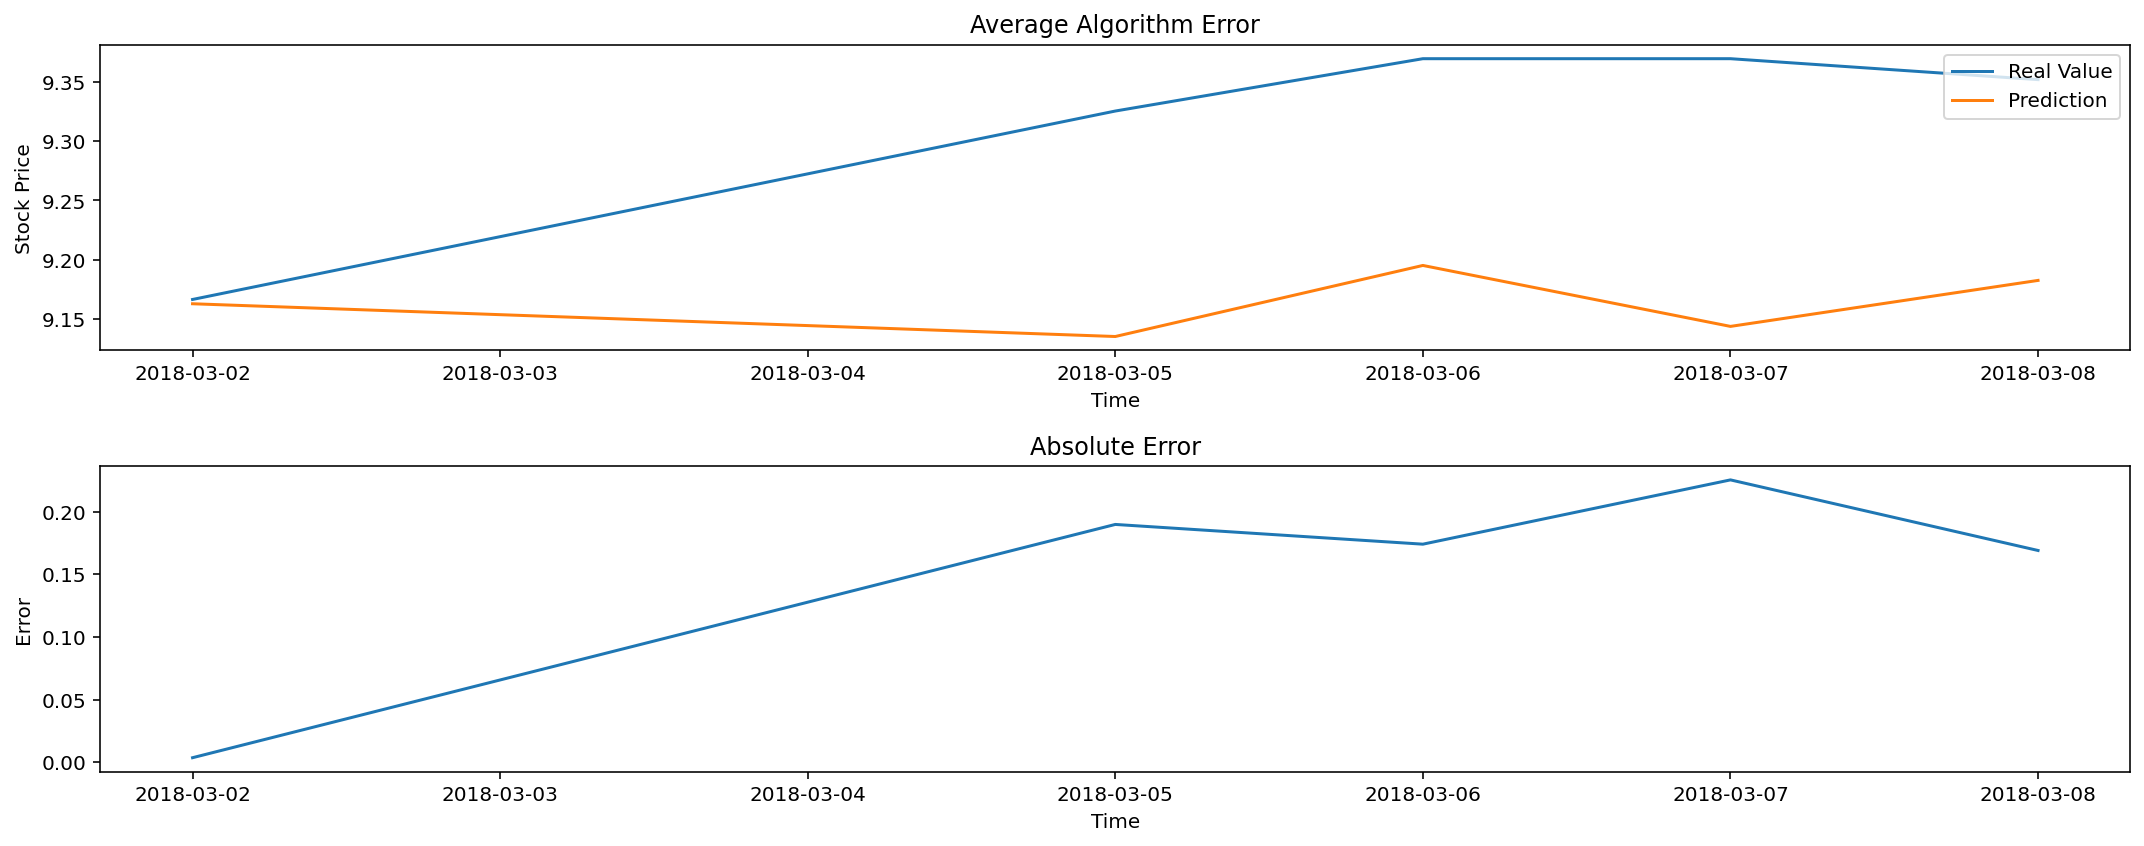

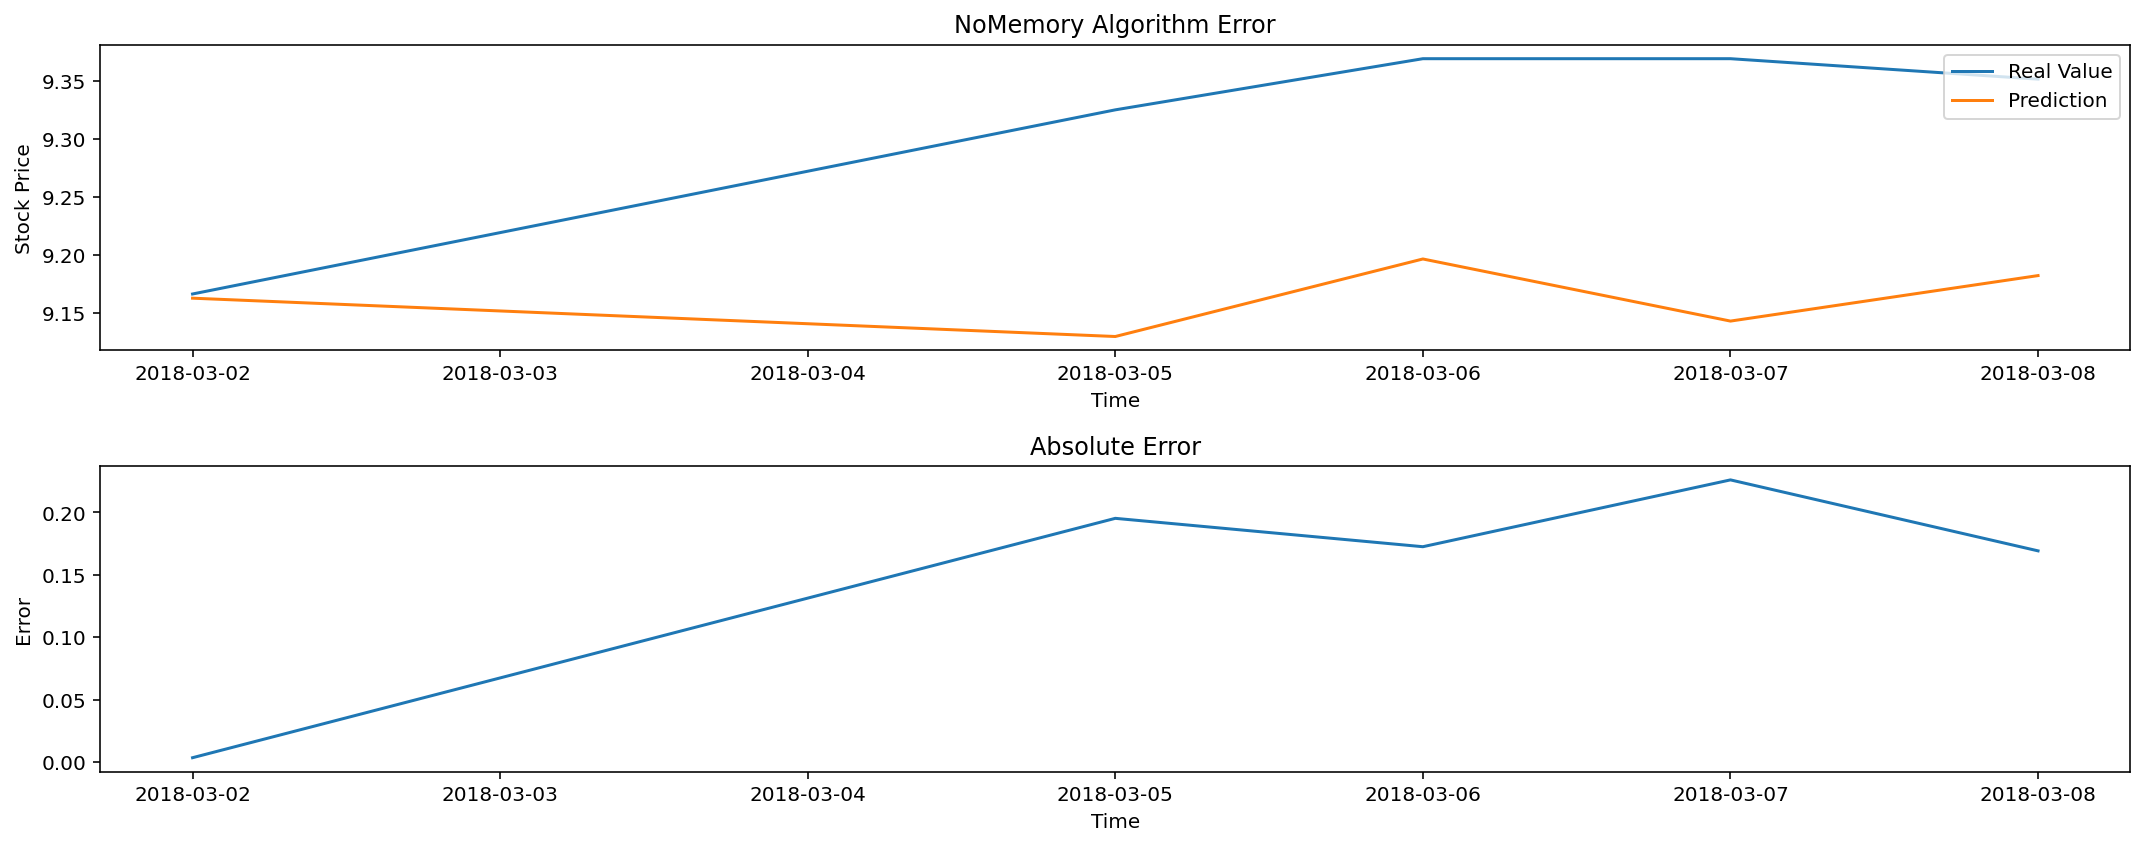

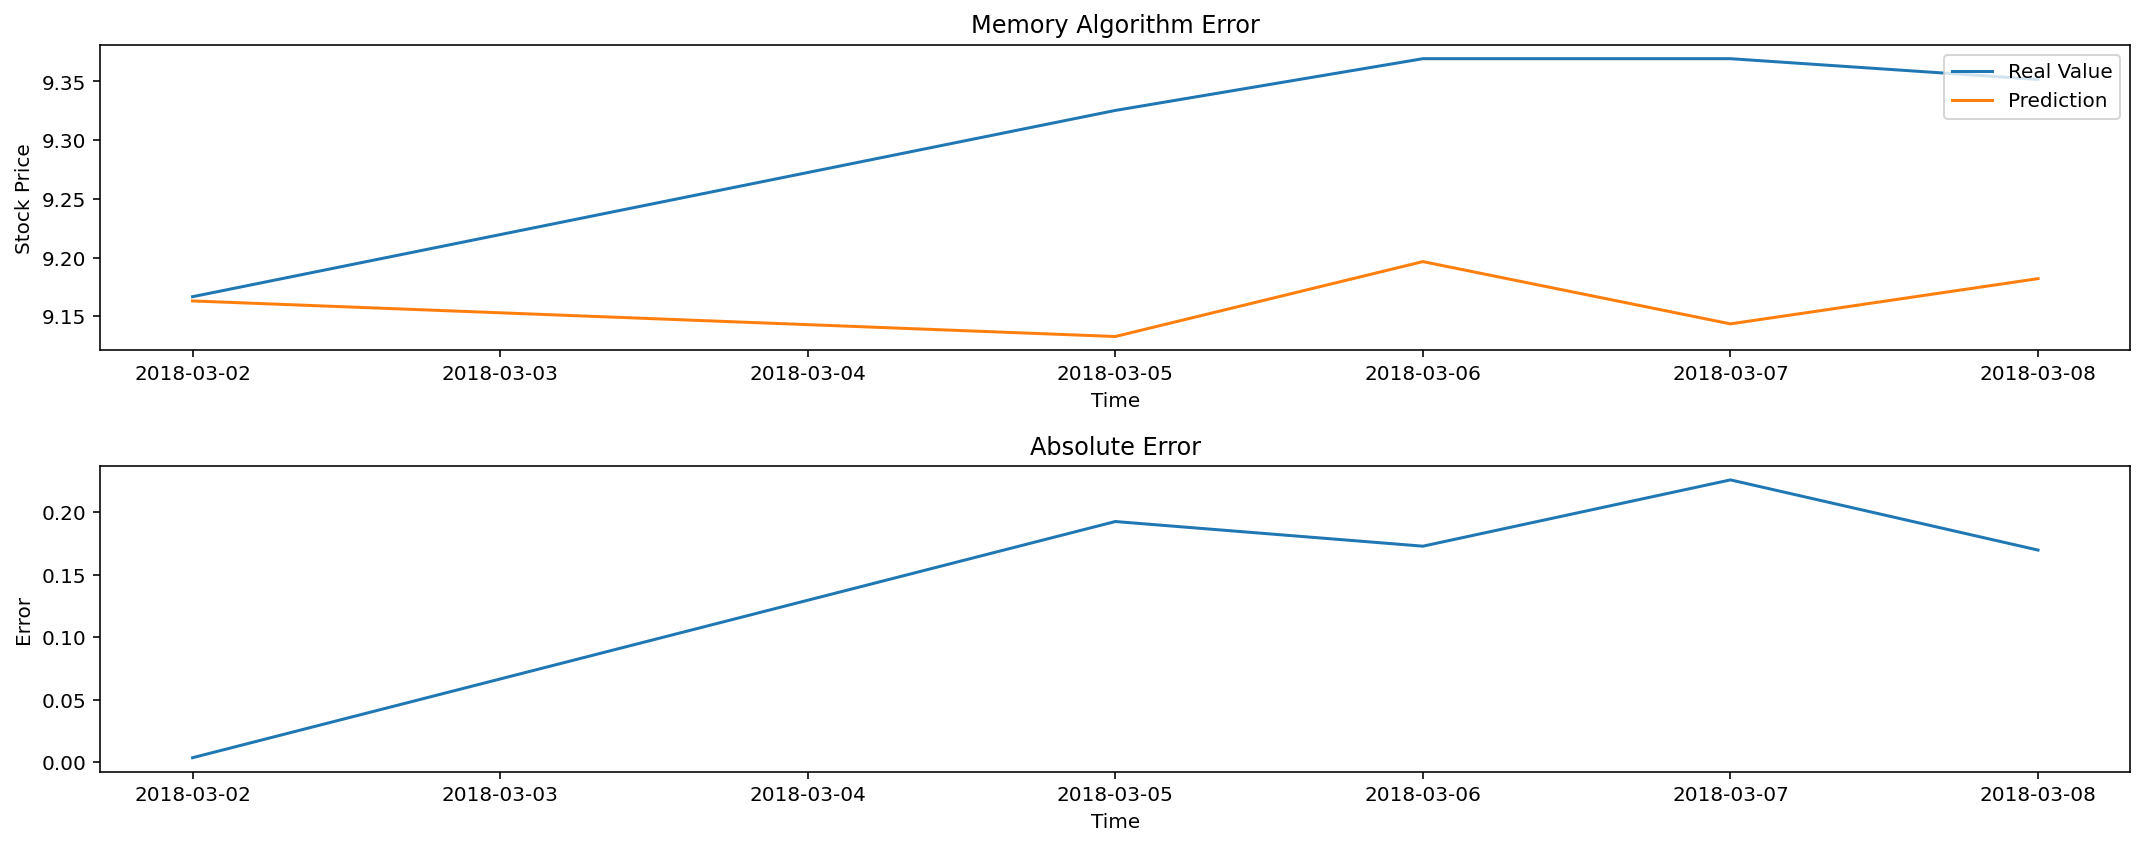

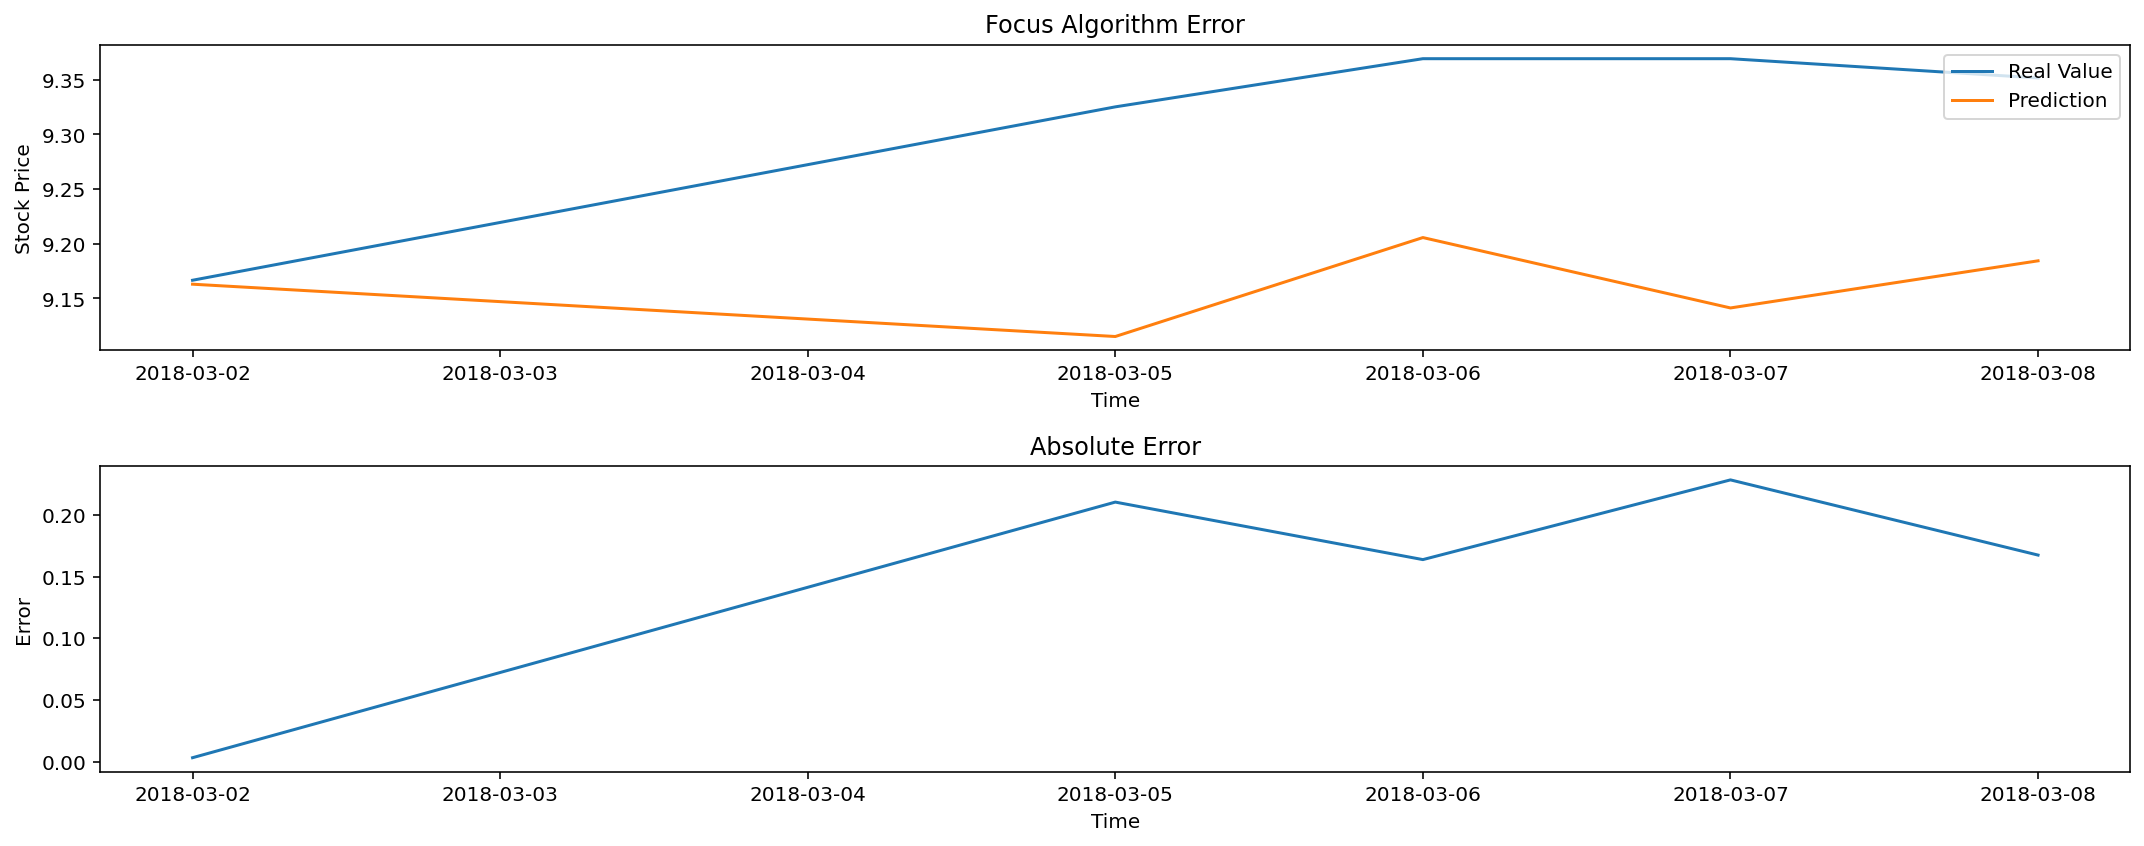

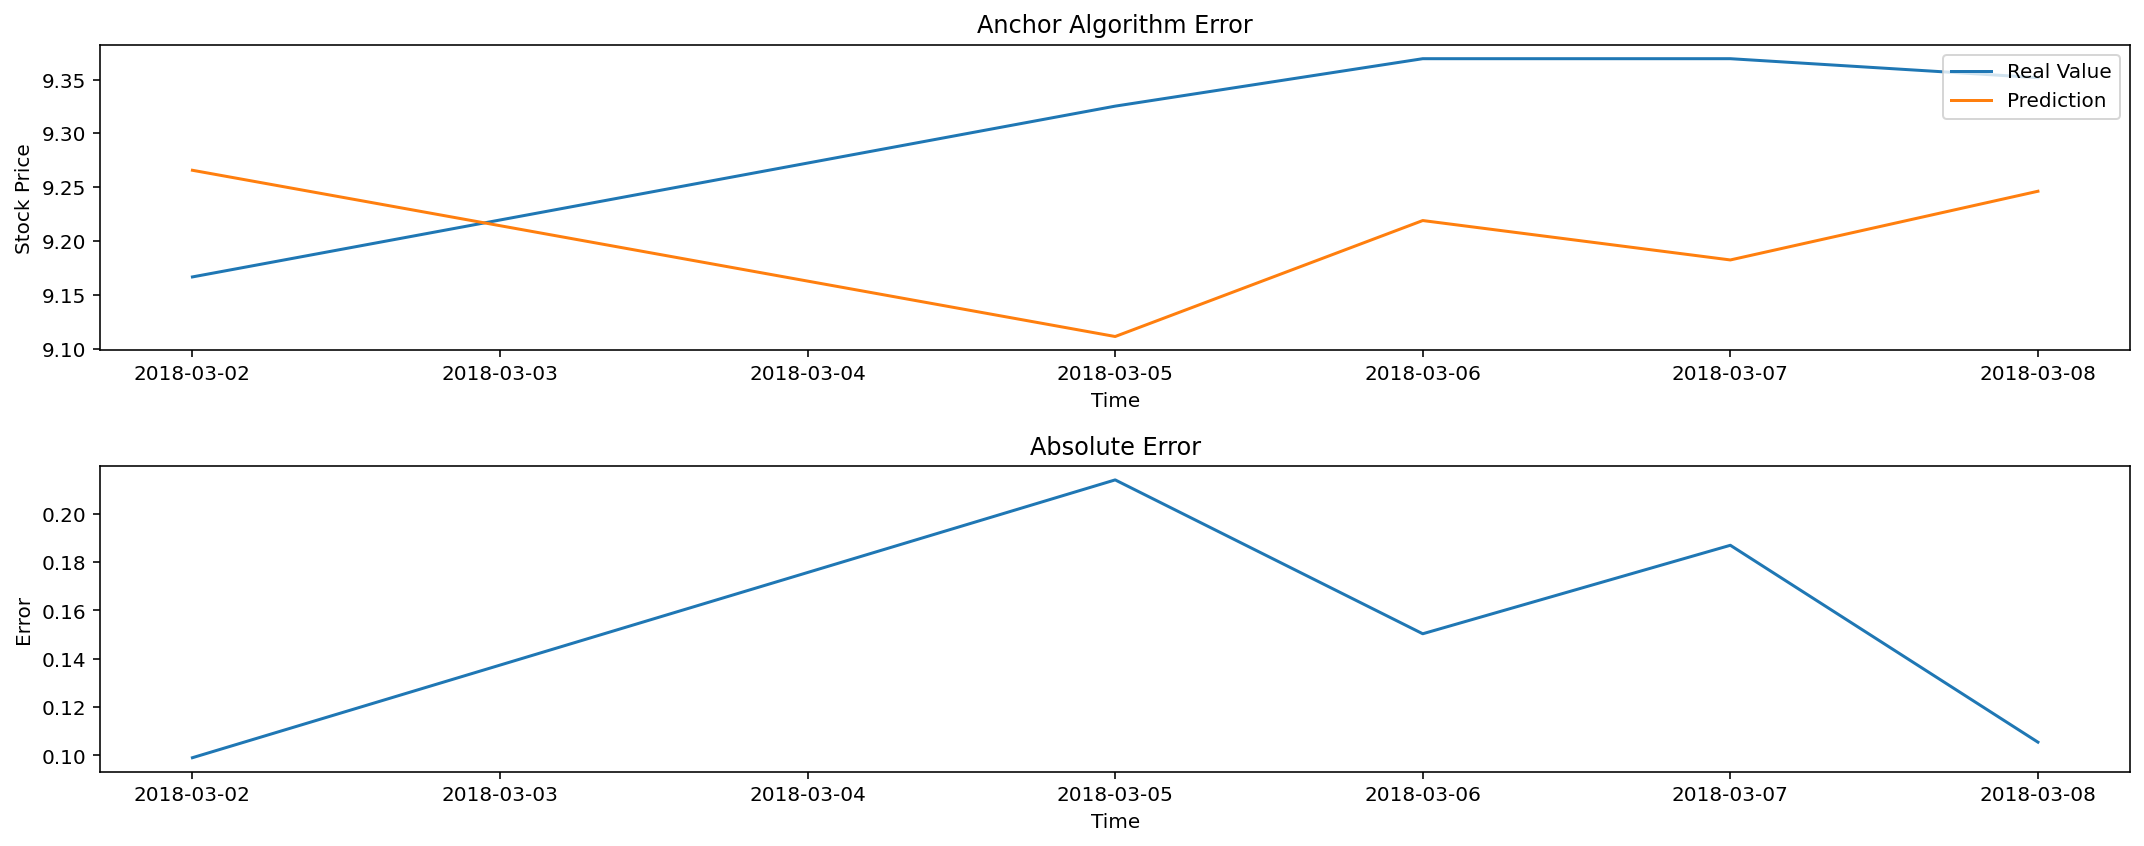

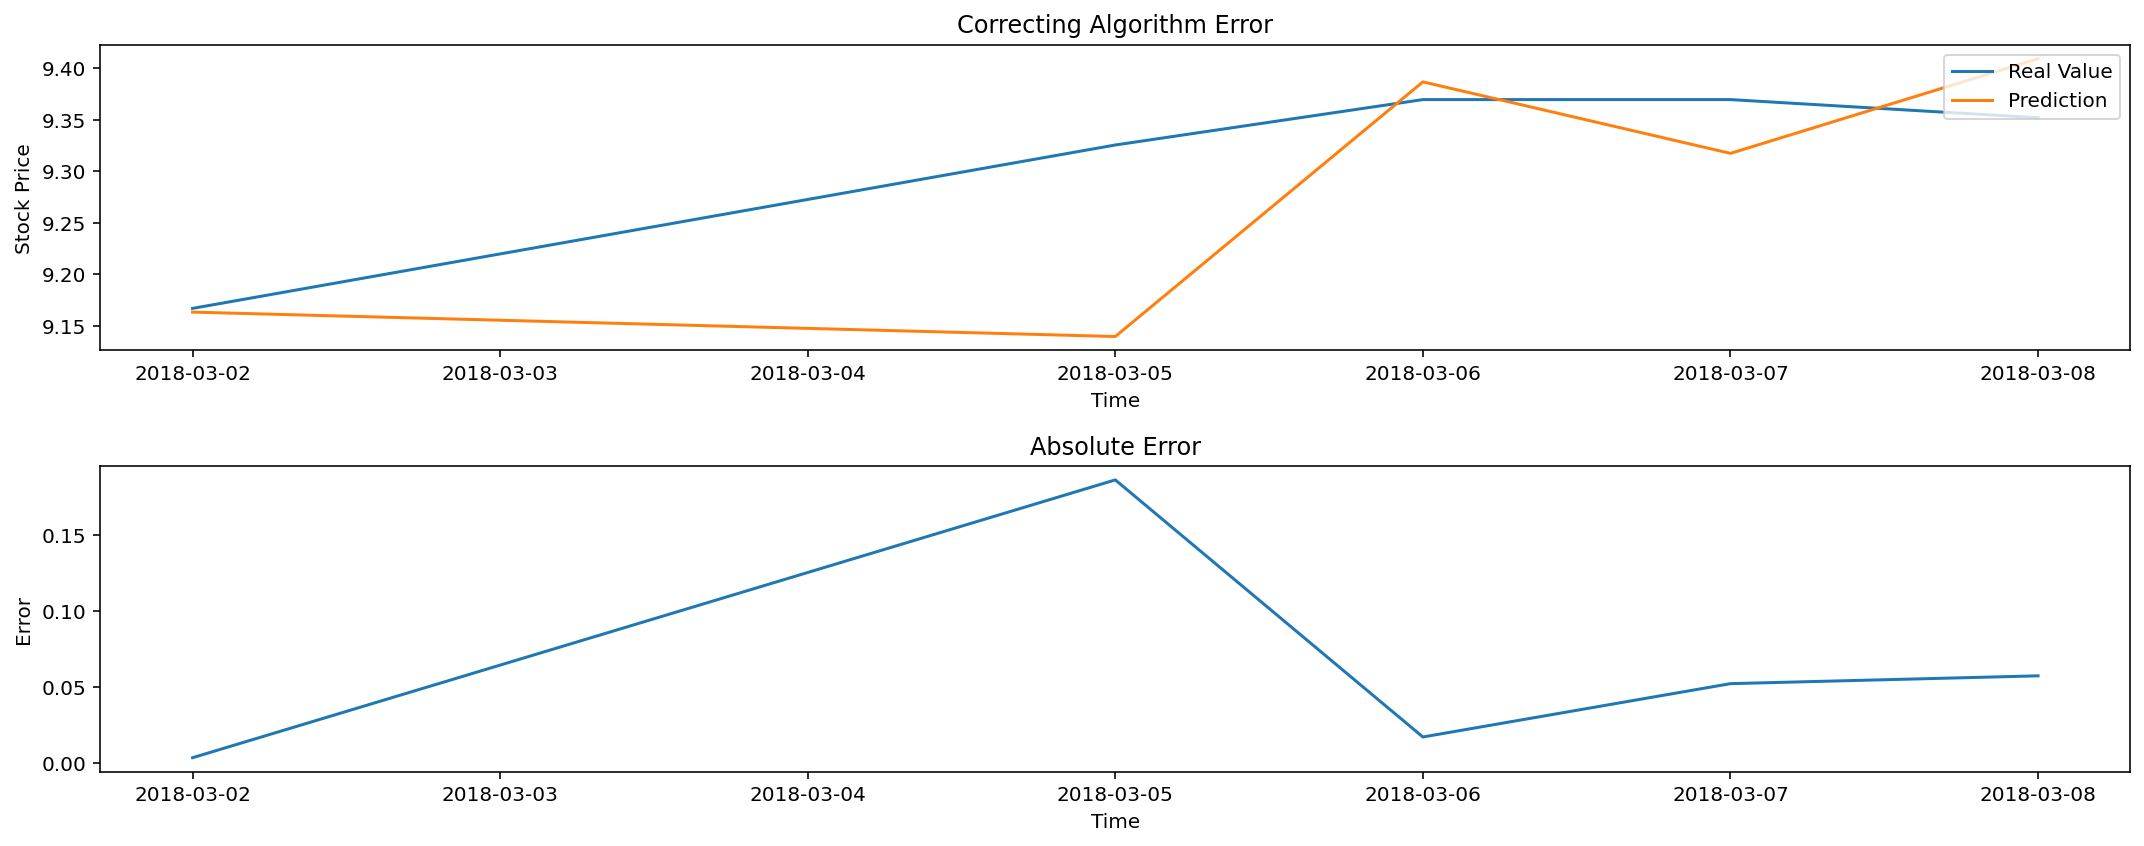

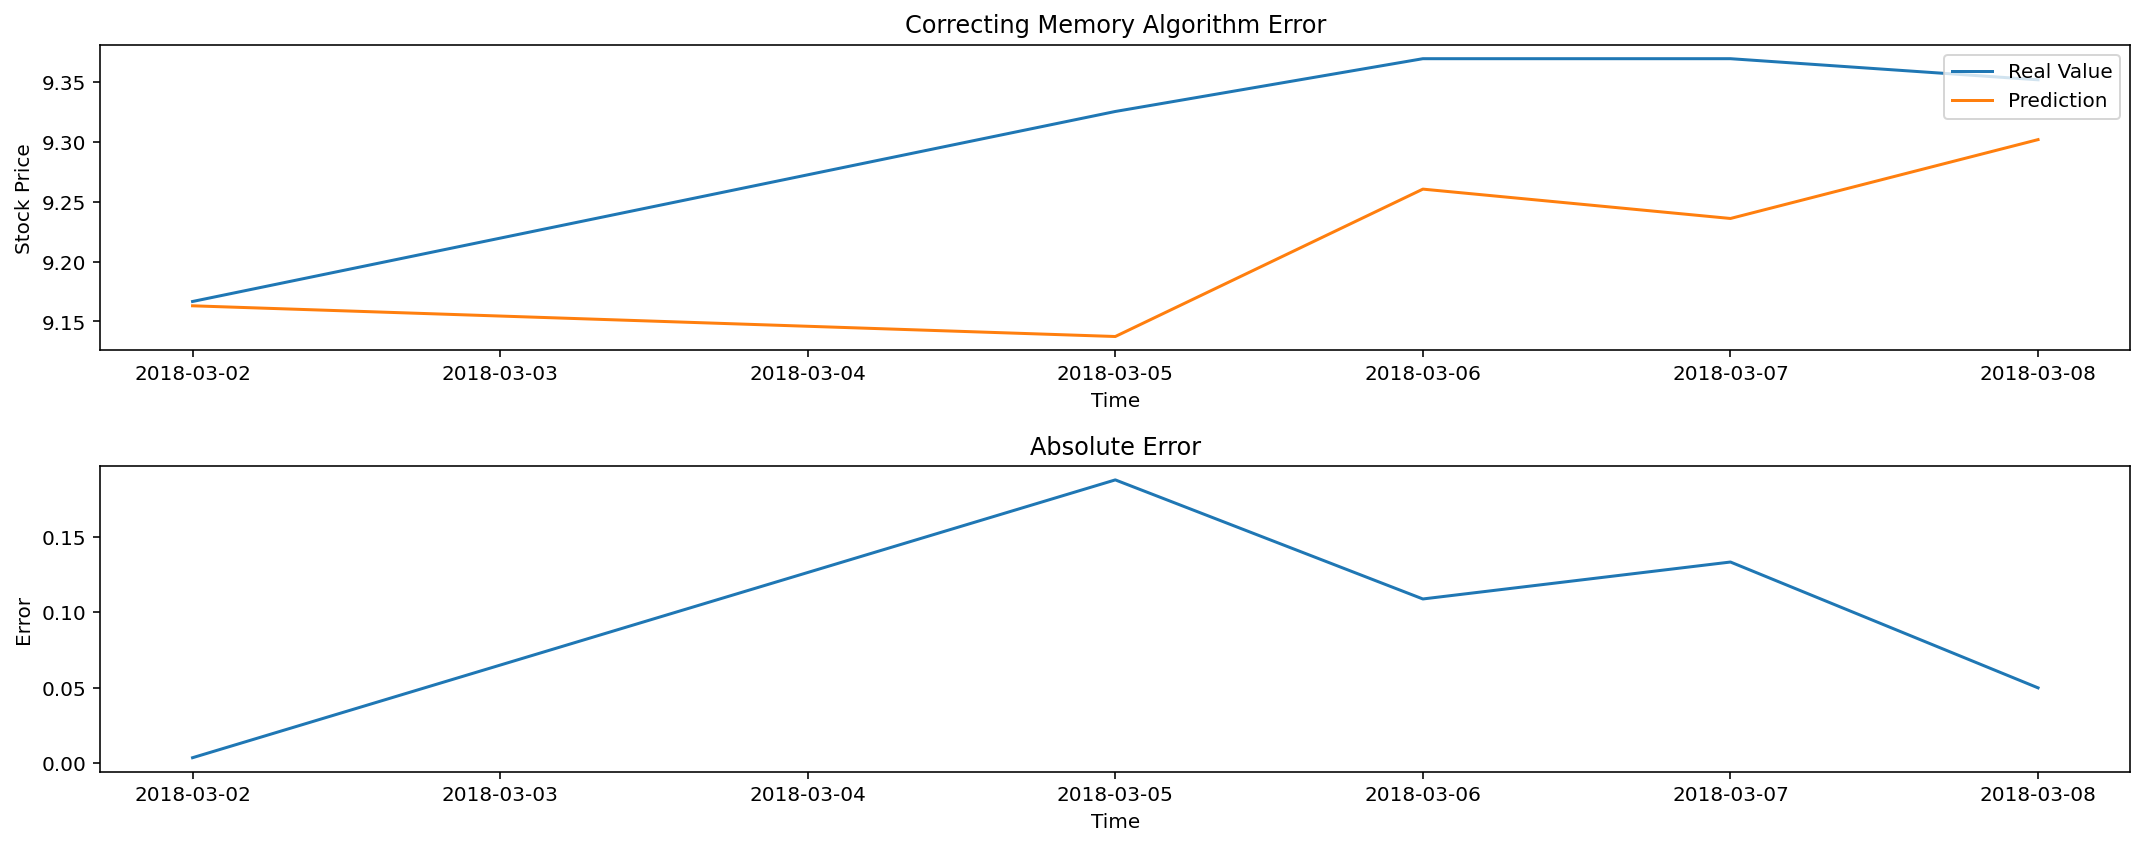

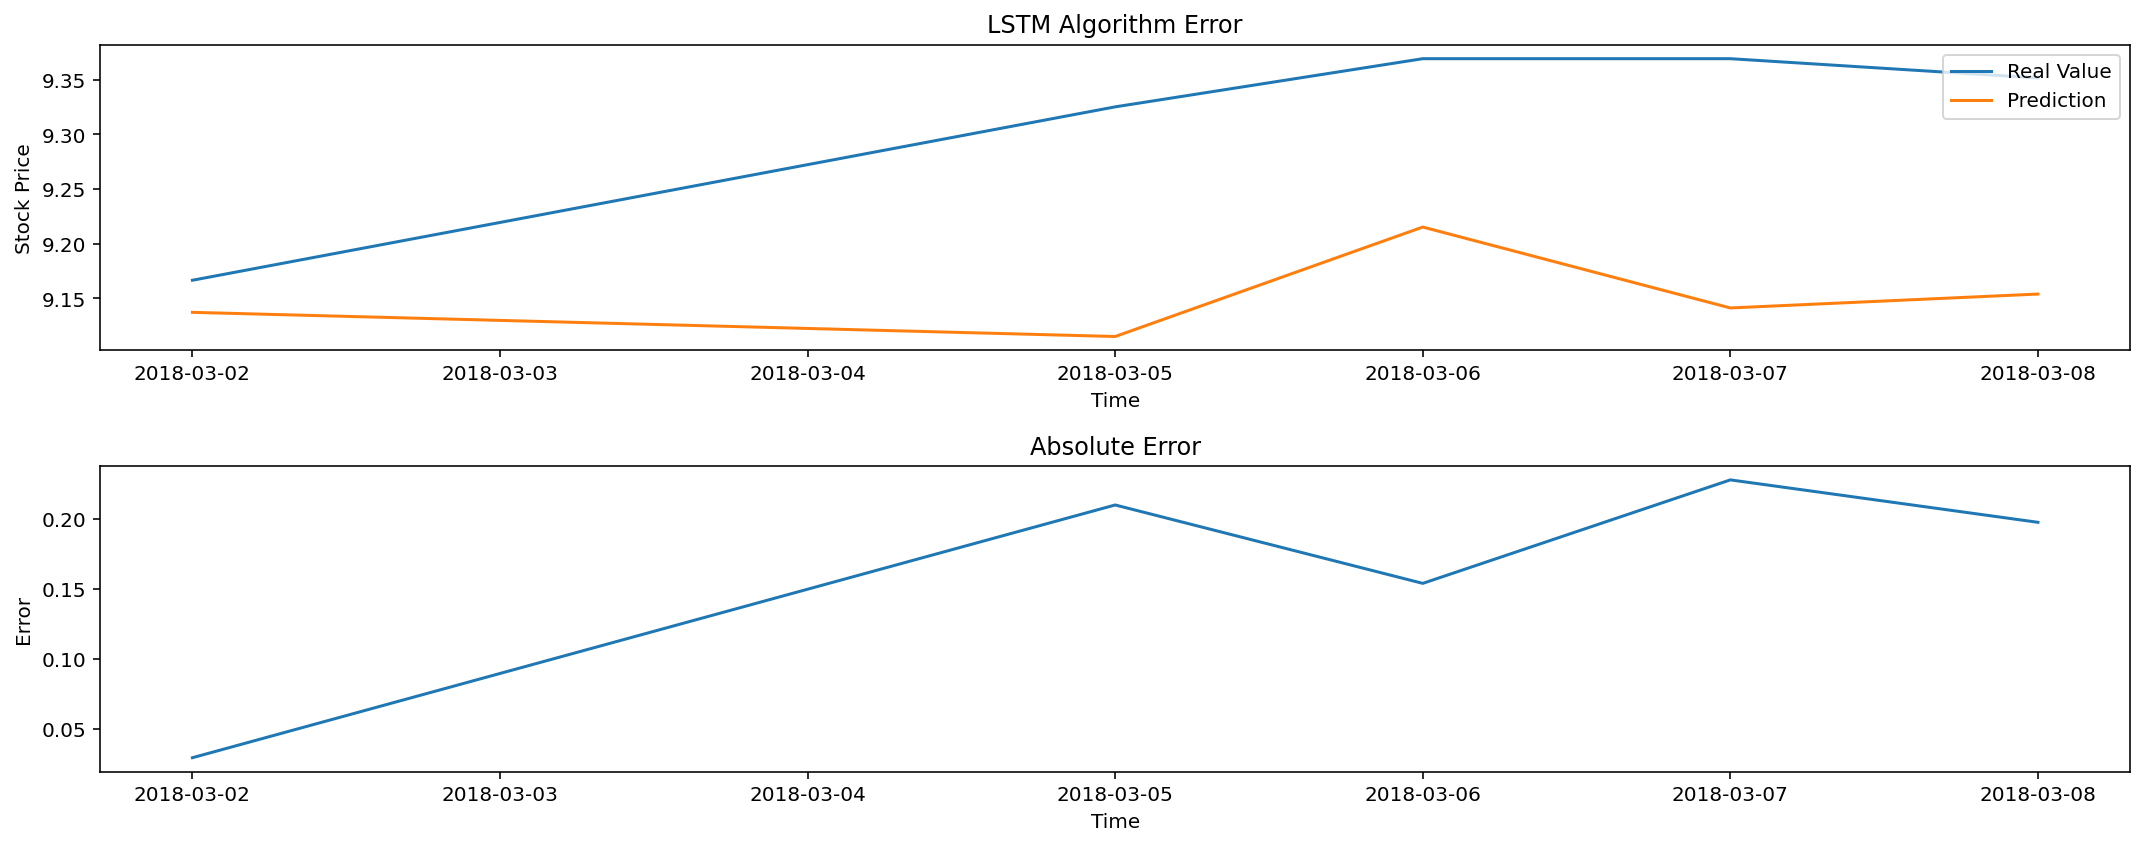

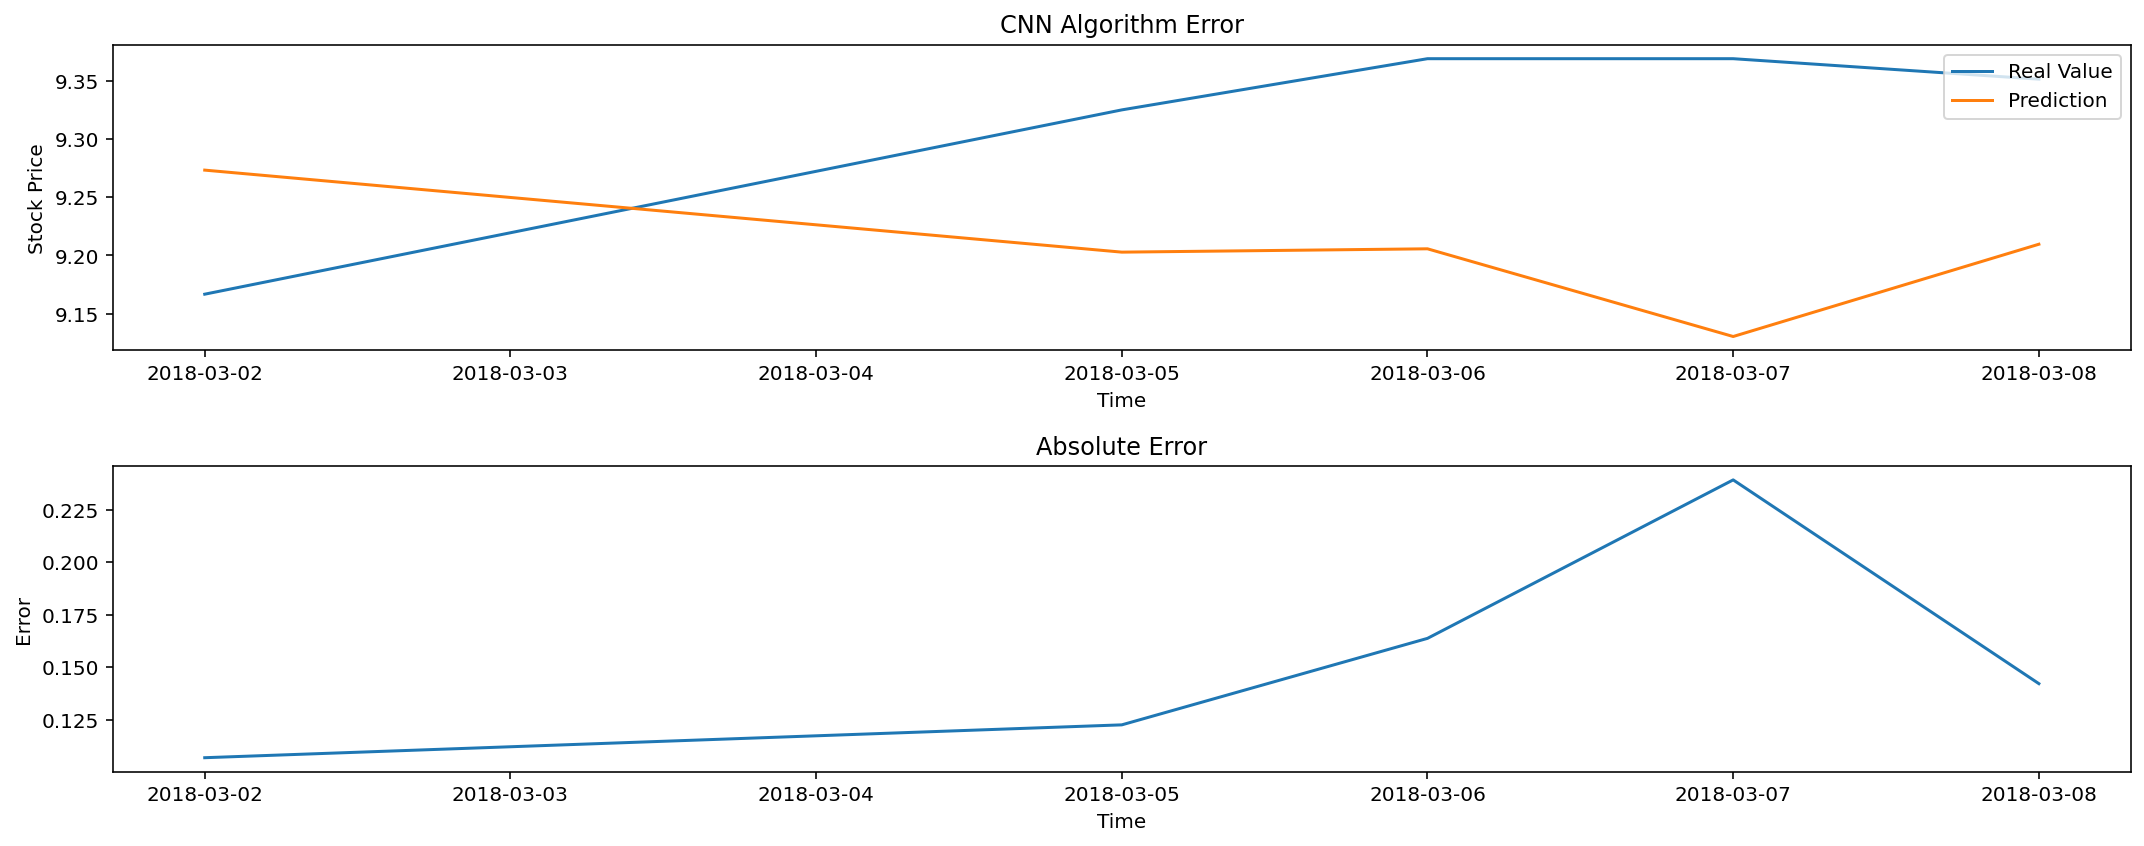

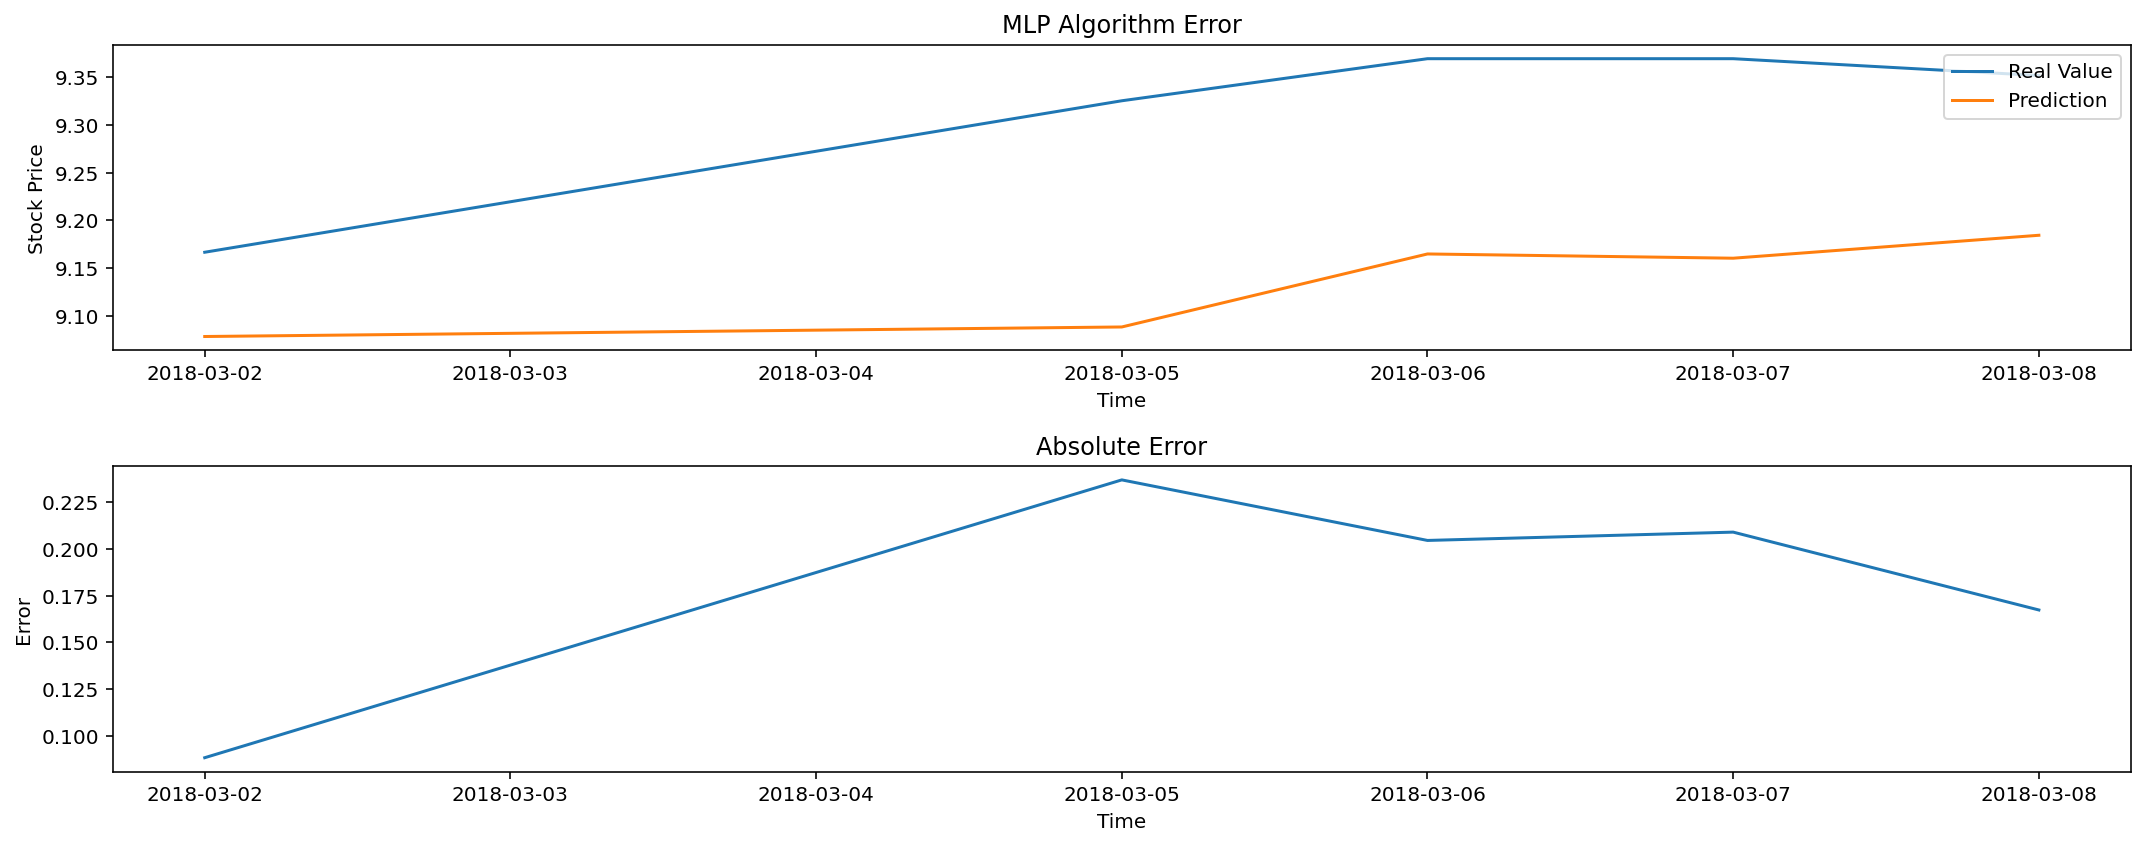

In [31]:
plot_performance(all_forecasts)